In [1]:
import pandas as pd
test_df = pd.read_csv("rust_70_Test_inference.csv")
test_df

,Unnamed: 0,text,label,pred
0,1346,trustedrandomaccess optimization for zip conta...,1,1
1,308,addressing a share static mut should be safe w...,0,0
2,881,ice on pattern match against const static i ma...,1,1
3,430,confusing error message associated with univer...,1,0
4,968,backslash at the end of line followed by n on ...,0,0
...,...,...,...,...
1094,1130,incremental compilation bug with async fn meth...,1,1
1095,1294,rustc panicked at failed to lookup sourcefile ...,1,1
1096,860,rustc crashes with exit code channels beta and...,1,1
1097,1459,inline assembly with tied operands of differen...,0,0


In [2]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test_df["label"].values, test_df["pred"].values)

print(cf_matrix)

[[378 162]
 [219 340]]


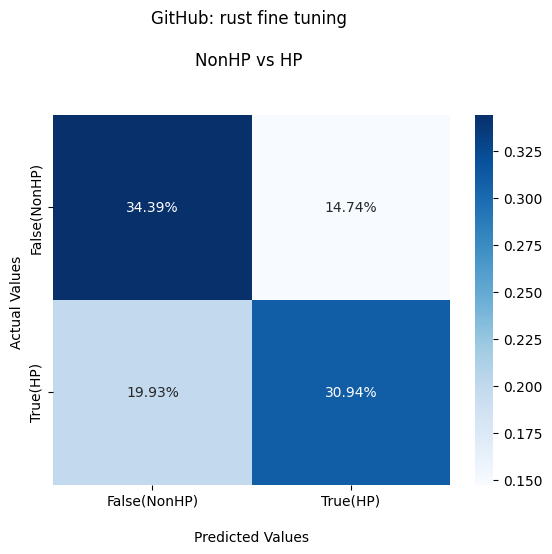

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('GitHub: rust fine tuning \n\nNonHP vs HP \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False(NonHP)','True(HP)'])
ax.yaxis.set_ticklabels(['False(NonHP)','True(HP)'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [4]:
from sklearn.metrics import classification_report


print(classification_report(test_df["label"].values, test_df["pred"].values))

              precision    recall  f1-score   support

           0       0.63      0.70      0.66       540
           1       0.68      0.61      0.64       559

    accuracy                           0.65      1099
   macro avg       0.66      0.65      0.65      1099
weighted avg       0.66      0.65      0.65      1099



In [5]:
from sklearn.metrics import matthews_corrcoef

# Calculate the Matthew's Correlation Coefficient
mcc = matthews_corrcoef(test_df["label"].values, test_df["pred"].values)
print("Matthew's Correlation Coefficient:", mcc)

Matthew's Correlation Coefficient: 0.30934081776162403
